# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{city}&appid={weather_api_key}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lon"]
        city_lng = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | patiala
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | fale old settlement
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | mayya
Processing Record 11 of Set 1 | chandbali
Processing Record 12 of Set 1 | rio claro
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | sungai penuh
Processing Record 17 of Set 1 | santa terezinha
Processing Record 18 of Set 1 | marau
Processing Record 19 of Set 1 | essex
Processing Record 20 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 21 of S

Processing Record 37 of Set 4 | northam
Processing Record 38 of Set 4 | skovorodino
Processing Record 39 of Set 4 | bom jesus
Processing Record 40 of Set 4 | postmasburg
City not found. Skipping...
Processing Record 41 of Set 4 | badger
Processing Record 42 of Set 4 | vorgashor
Processing Record 43 of Set 4 | crane
Processing Record 44 of Set 4 | urengoy
Processing Record 45 of Set 4 | bluefields
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | new plymouth
Processing Record 48 of Set 4 | lethem
Processing Record 49 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 0 of Set 5 | tarauaca
Processing Record 1 of Set 5 | arraial do cabo
Processing Record 2 of Set 5 | falenki
Processing Record 3 of Set 5 | hermanus
Processing Record 4 of Set 5 | tazovsky
Processing Record 5 of Set 5 | conde
Processing Record 6 of Set 5 | catriel
Processing Record 7 of Set 5 | namibe
Processing Record 8 of Set 5 | severo-yeniseyskiy
Processing Record 9 of Set 5 | verno

Processing Record 26 of Set 8 | bata
Processing Record 27 of Set 8 | taoudenni
Processing Record 28 of Set 8 | vila franca do campo
Processing Record 29 of Set 8 | siniscola
Processing Record 30 of Set 8 | kamiiso
Processing Record 31 of Set 8 | pitea
Processing Record 32 of Set 8 | praia da vitoria
Processing Record 33 of Set 8 | sidney
Processing Record 34 of Set 8 | macia
Processing Record 35 of Set 8 | grabo
Processing Record 36 of Set 8 | taoyuan city
Processing Record 37 of Set 8 | cruzeiro do sul
Processing Record 38 of Set 8 | ancud
Processing Record 39 of Set 8 | cassilandia
Processing Record 40 of Set 8 | piti village
Processing Record 41 of Set 8 | hadsund
Processing Record 42 of Set 8 | porto-vecchio
Processing Record 43 of Set 8 | antonio enes
Processing Record 44 of Set 8 | nalerigu
City not found. Skipping...
Processing Record 45 of Set 8 | burutu
Processing Record 46 of Set 8 | san juan de miraflores
Processing Record 47 of Set 8 | wuxue
Processing Record 48 of Set 8 | 

Processing Record 17 of Set 12 | ahau
City not found. Skipping...
Processing Record 18 of Set 12 | yenicaga
Processing Record 19 of Set 12 | port augusta
Processing Record 20 of Set 12 | tamanrasset
Processing Record 21 of Set 12 | enns
Processing Record 22 of Set 12 | bati
Processing Record 23 of Set 12 | muncar
Processing Record 24 of Set 12 | chernyshevskiy
Processing Record 25 of Set 12 | kirensk
Processing Record 26 of Set 12 | pahrump
Processing Record 27 of Set 12 | kaiapoi
Processing Record 28 of Set 12 | caucel
Processing Record 29 of Set 12 | katsuren-haebaru
Processing Record 30 of Set 12 | ulsteinvik
Processing Record 31 of Set 12 | villa gesell
Processing Record 32 of Set 12 | elmali
Processing Record 33 of Set 12 | narayanpet
Processing Record 34 of Set 12 | songea
Processing Record 35 of Set 12 | otacilio costa
Processing Record 36 of Set 12 | massa marittima
Processing Record 37 of Set 12 | singkil
Processing Record 38 of Set 12 | acaponeta
Processing Record 39 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,patiala,76.4003,30.3267,293.12,51,0,1.54,IN,1728780030
1,adamstown,-130.1015,-25.0660,294.45,79,98,4.26,PN,1728780032
2,edinburgh of the seven seas,-12.3116,-37.0676,286.19,72,10,5.17,SH,1728780033
3,port elizabeth,25.5701,-33.9180,291.31,96,75,6.69,ZA,1728780035
4,olonkinbyen,-8.7187,70.9221,271.62,96,100,13.33,SJ,1728780037


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,patiala,76.4003,30.3267,293.12,51,0,1.54,IN,1728780030
1,adamstown,-130.1015,-25.0660,294.45,79,98,4.26,PN,1728780032
2,edinburgh of the seven seas,-12.3116,-37.0676,286.19,72,10,5.17,SH,1728780033
3,port elizabeth,25.5701,-33.9180,291.31,96,75,6.69,ZA,1728780035
4,olonkinbyen,-8.7187,70.9221,271.62,96,100,13.33,SJ,1728780037


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

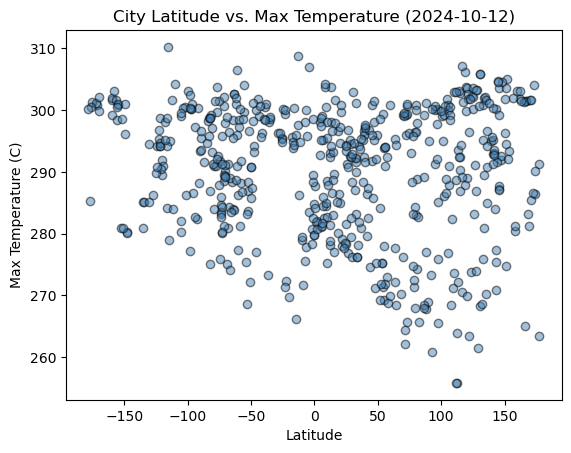

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor='black', facecolor='steelblue', alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2024-10-12)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

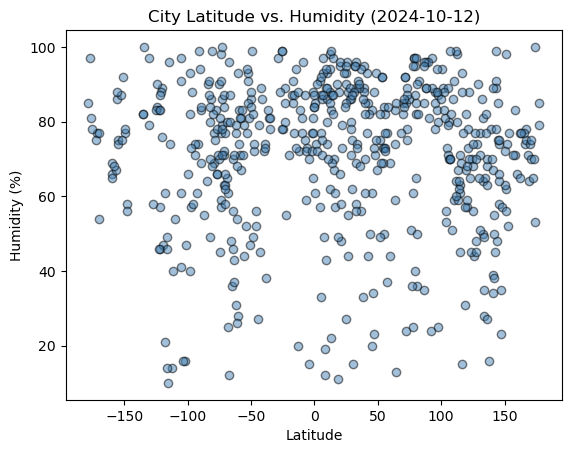

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black", facecolor="steelblue", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-10-12)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

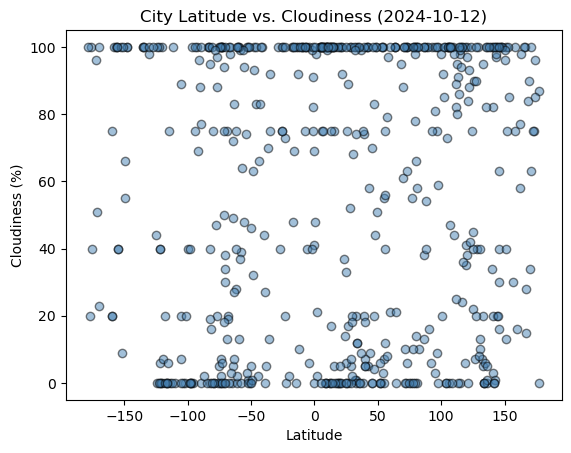

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black", facecolor="steelblue", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-10-12)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

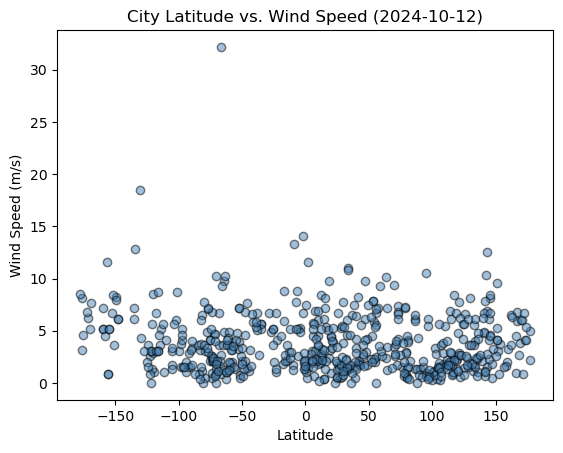

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black", facecolor="steelblue", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-10-12)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [28]:
linregress_model = linregress(city_data_df["Lat"], city_data_df["Wind Speed"])

In [33]:
linregress_model.slope

-0.00320843089819657

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots

def linregressplots(x_values, y_values):
    
    ## Dictionary to return with the function containing slope, intercept, predicted y_values, and r^2
    return_dict = {}
    
    ## Linear regression model
    linregress_model = linregress(x_values, y_values)
    
    ## Slope of linear regression model
    return_dict["slope"] = linregress_model.slope
    
    ## y-intercept of linear regression model
    return_dict["intercept"] = linregress_model.intercept
    
    ## Predicted y values generated by linear regression model
    return_dict["regress_values"] = x_values * linregress_model.slope + linregress_model.intercept
    
    ## R^2 value
    return_dict["r^2"] = (linregress_model.rvalue)**2
    
    ## Return dictionary containing slope, intercept, predicted y_values, and r^2
    return return_dict

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,patiala,76.4003,30.3267,293.12,51,0,1.54,IN,1728780030
3,port elizabeth,25.5701,-33.9180,291.31,96,75,6.69,ZA,1728780035
8,margaret river,115.0667,-33.9500,290.27,61,0,2.84,AU,1728780044
9,mayya,130.2811,61.7333,268.29,77,13,1.87,RU,1728780045
10,chandbali,86.7667,20.7833,299.23,85,13,1.36,IN,1728780047


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-130.1015,-25.0660,294.45,79,98,4.26,PN,1728780032
2,edinburgh of the seven seas,-12.3116,-37.0676,286.19,72,10,5.17,SH,1728780033
4,olonkinbyen,-8.7187,70.9221,271.62,96,100,13.33,SJ,1728780037
5,yellowknife,-114.3525,62.4560,278.94,96,75,3.60,CA,1728780038
6,fortuna,-124.1573,40.5982,294.22,84,0,3.60,US,1728780040


###  Temperature vs. Latitude Linear Regression Plot

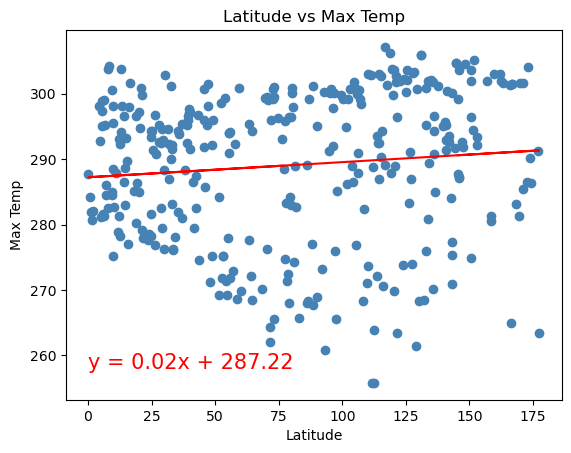

The r^2 value is 0.010413762934799516


In [66]:
# NORTHERN HEMISPHERE

values = linregressplots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

## Plot the datapoints
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker='o', facecolor='steelblue')

## Plot line of linear regression model
plt.plot(northern_hemi_df["Lat"], values["regress_values"], color='red', linestyle='-')

## Label line of linear regression model
slope = values["slope"]
intercept = values["intercept"]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (0, 258), fontsize=15,color="red")

## Label x-axis
plt.xlabel("Latitude")

## Label y-axis
plt.ylabel("Max Temp")

## Graph title
plt.title("Latitude vs Max Temp")
plt.show()

## Print r^2
r_2 = values["r^2"]
print(f"The r^2 value is {r_2}")

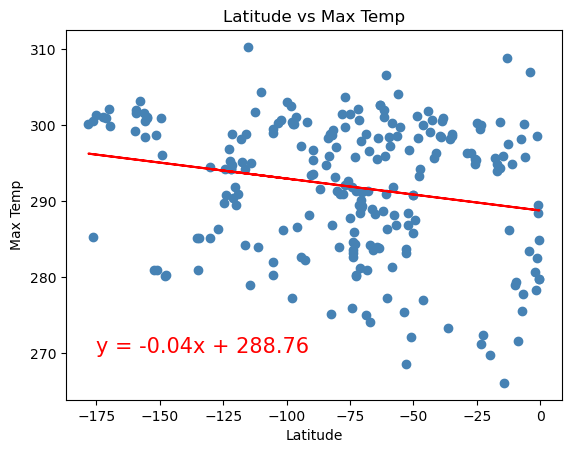

The r^2 value is 0.04454010215775654


In [68]:
# SOUTHERN HEMISPHERE

values = linregressplots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

## Plot the datapoints
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker='o', facecolor='steelblue')

## Plot line of linear regression model
plt.plot(southern_hemi_df["Lat"], values["regress_values"], color='red', linestyle='-')

## Label line of linear regression model
slope = values["slope"]
intercept = values["intercept"]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-175, 270), fontsize=15,color="red")

## Label x-axis
plt.xlabel("Latitude")

## Label y-axis
plt.ylabel("Max Temp")

## Graph title
plt.title("Latitude vs Max Temp")
plt.show()

## Print r^2
r_2 = values["r^2"]
print(f"The r^2 value is {r_2}")

**Discussion about the linear relationship:** There is almost no correlation between latitude and max temperature for both the Northern and Southern Hemispheres for 10/12/24 PDT

### Humidity vs. Latitude Linear Regression Plot

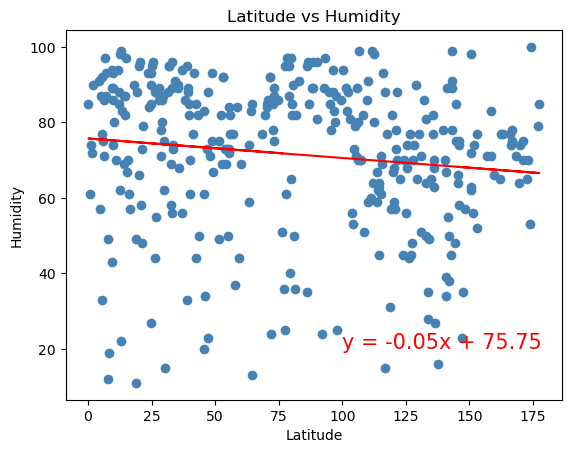

The r^2 value is 0.017131436443428318


In [72]:
# NORTHERN HEMISPHERE

values = linregressplots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

## Plot the datapoints
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker='o', facecolor='steelblue')

## Plot line of linear regression model
plt.plot(northern_hemi_df["Lat"], values["regress_values"], color='red', linestyle='-')

## Label line of linear regression model
slope = values["slope"]
intercept = values["intercept"]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (100, 20), fontsize=15,color="red")

## Label x-axis
plt.xlabel("Latitude")

## Label y-axis
plt.ylabel("Humidity")

## Graph title
plt.title("Latitude vs Humidity")

plt.show()

## Print r^2
r_2 = values["r^2"]
print(f"The r^2 value is {r_2}")

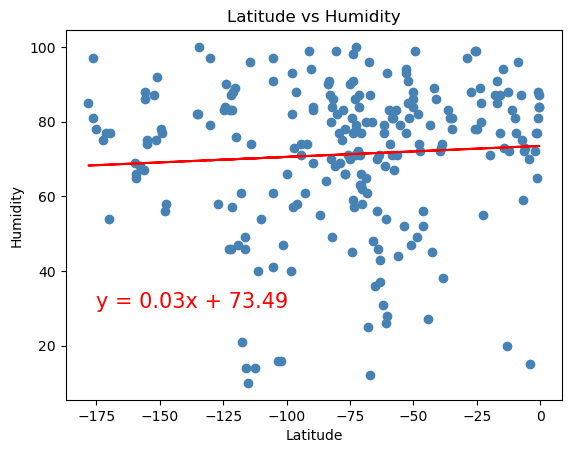

The r^2 value is 0.004474628902984696


In [74]:
# SOUTHERN HEMISPHERE

values = linregressplots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

## Plot the datapoints
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker='o', facecolor='steelblue')

## Plot line of linear regression model
plt.plot(southern_hemi_df["Lat"], values["regress_values"], color='red', linestyle='-')

## Label line of linear regression model
slope = values["slope"]
intercept = values["intercept"]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-175, 30), fontsize=15,color="red")

## Label x-axis
plt.xlabel("Latitude")

## Label y-axis
plt.ylabel("Humidity")

## Graph title
plt.title("Latitude vs Humidity")

plt.show()

## Print r^2
r_2 = values["r^2"]
print(f"The r^2 value is {r_2}")

**Discussion about the linear relationship:** As of 10/12/24 PDT, there is almost no correlation between latitude and humidity for both the Northern and Southern Hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

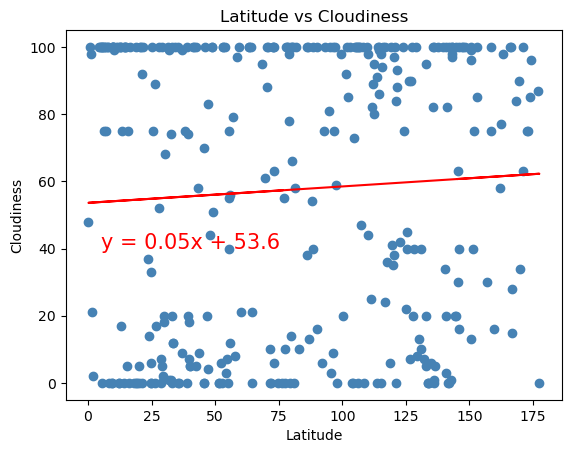

The r^2 value is 0.0035025450438465017


In [78]:
# NORTHERN HEMISPHERE

values = linregressplots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

## Plot the datapoints
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker='o', facecolor='steelblue')

## Plot line of linear regression model
plt.plot(northern_hemi_df["Lat"], values["regress_values"], color='red', linestyle='-')

## Label line of linear regression model
slope = values["slope"]
intercept = values["intercept"]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (5, 40), fontsize=15,color="red")

## Label x-axis
plt.xlabel("Latitude")

## Label y-axis
plt.ylabel("Cloudiness")

## Graph title
plt.title("Latitude vs Cloudiness")

plt.show()

## Print r^2
r_2 = values["r^2"]
print(f"The r^2 value is {r_2}")

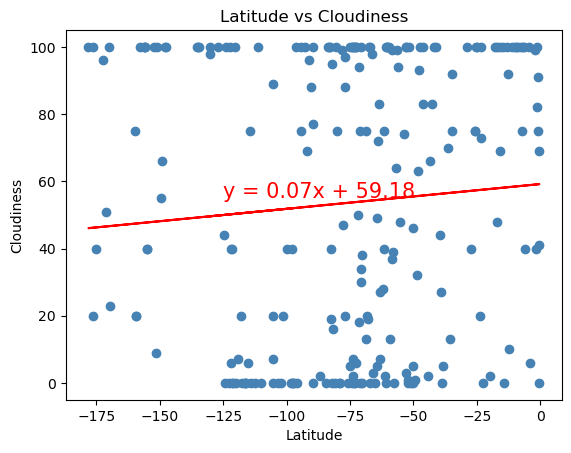

The r^2 value is 0.006248703685697329


In [79]:
# SOUTHERN HEMISPHERE

values = linregressplots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

## Plot the datapoints
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker='o', facecolor='steelblue')

## Plot line of linear regression model
plt.plot(southern_hemi_df["Lat"], values["regress_values"], color='red', linestyle='-')

## Label line of linear regression model
slope = values["slope"]
intercept = values["intercept"]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-125, 55), fontsize=15,color="red")

## Label x-axis
plt.xlabel("Latitude")

## Label y-axis
plt.ylabel("Cloudiness")

## Graph title
plt.title("Latitude vs Cloudiness")

plt.show()

## Print r^2
r_2 = values["r^2"]
print(f"The r^2 value is {r_2}")

**Discussion about the linear relationship:** There is nearly no correlation between latitude and cloudiness for both the Northern and Southern Hemispheres on 10/12/24 PDT

### Wind Speed vs. Latitude Linear Regression Plot

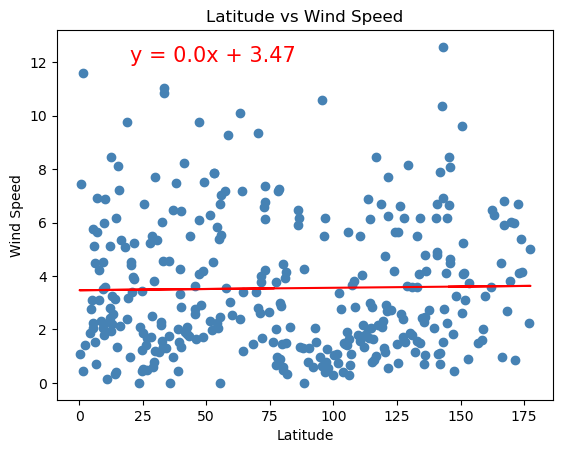

The r^2 value is 0.0003351651379417962


In [82]:
# NORTHERN HEMISPHERE

values = linregressplots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

## Plot the datapoints
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker='o', facecolor='steelblue')

## Plot line of linear regression model
plt.plot(northern_hemi_df["Lat"], values["regress_values"], color='red', linestyle='-')

## Label line of linear regression model
slope = values["slope"]
intercept = values["intercept"]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (20, 12), fontsize=15,color="red")

## Label x-axis
plt.xlabel("Latitude")

## Label y-axis
plt.ylabel("Wind Speed")

## Graph title
plt.title("Latitude vs Wind Speed")

plt.show()

## Print r^2
r_2 = values["r^2"]
print(f"The r^2 value is {r_2}")

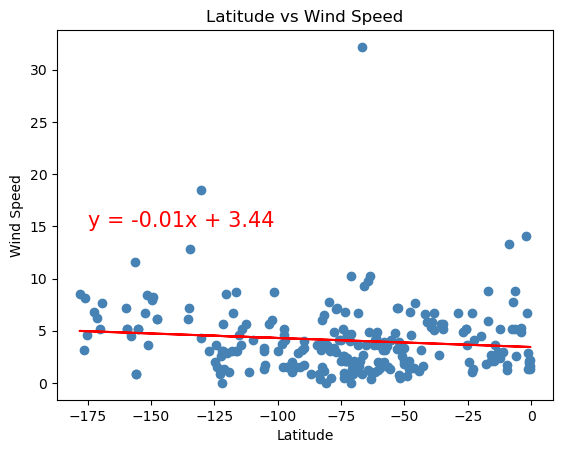

The r^2 value is 0.013276814892557448


In [84]:
# SOUTHERN HEMISPHERE

values = linregressplots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

## Plot the datapoints
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker='o', facecolor='steelblue')

## Plot line of linear regression model
plt.plot(southern_hemi_df["Lat"], values["regress_values"], color='red', linestyle='-')

## Label line of linear regression model
slope = values["slope"]
intercept = values["intercept"]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-175, 15), fontsize=15,color="red")

## Label x-axis
plt.xlabel("Latitude")

## Label y-axis
plt.ylabel("Wind Speed")

## Graph title
plt.title("Latitude vs Wind Speed")

plt.show()

## Print r^2
r_2 = values["r^2"]
print(f"The r^2 value is {r_2}")

**Discussion about the linear relationship:** There is nearly no correlation between latitude and wind speed for both the Northern and Southern Hemispheres on 10/12/24 PDT